In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("/Users/Rashad/Documents/GitHub/CORE_Resampling_Datetime_Data/Data/london_weather_MODIFIED.csv")
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,19790101,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,19790102,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,19790103,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,19790104,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,19790105,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,20201227,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,20201228,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,20201229,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,20201230,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15341 entries, 0 to 15340
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   date              15341 non-null  int64  
 1   cloud_cover       14938 non-null  float64
 2   sunshine          14957 non-null  float64
 3   global_radiation  14939 non-null  float64
 4   max_temp          14951 non-null  float64
 5   mean_temp         14922 non-null  float64
 6   min_temp          14955 non-null  float64
 7   precipitation     14951 non-null  float64
 8   pressure          14953 non-null  float64
 9   snow_depth        13589 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 1.2 MB


In [4]:
df.describe()

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
count,1.534100e+04,14938.000000,14957.000000,14939.000000,14951.000000,14922.000000,14955.000000,14951.000000,14953.000000,13589.000000
mean,1.999567e+07,5.276275,4.348947,118.760024,15.377667,11.463939,7.550471,1.662003,101537.611182,0.038634
std,1.212176e+05,2.066946,4.027593,88.844154,6.556762,5.729383,5.327638,3.730315,1048.800019,0.551226
min,1.979010e+07,0.000000,0.000000,12.000000,-6.200000,-7.600000,-11.800000,0.000000,95960.000000,0.000000
25%,1.989070e+07,4.000000,0.500000,41.000000,10.500000,7.000000,3.500000,0.000000,100920.000000,0.000000
50%,2.000010e+07,6.000000,3.500000,95.000000,15.000000,11.400000,7.800000,0.000000,101620.000000,0.000000
75%,2.010070e+07,7.000000,7.200000,186.000000,20.300000,16.000000,11.800000,1.600000,102240.000000,0.000000
max,2.020123e+07,9.000000,16.000000,402.000000,37.900000,29.000000,22.300000,61.800000,104820.000000,22.000000


# (Part 1) Load the data and make a datetime index.

## Convert the date column to datetime dtype.

In [5]:
df['date'] = pd.to_datetime(df['date'], format='%Y%m%d')
df

,date,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
0,1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1,1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
2,1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
3,1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
4,1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...,...
15336,2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
15337,2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
15338,2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN
15339,2020-12-30,6.0,0.4,22.0,5.6,2.7,-0.1,0.0,100200.0,NaN


In [6]:
#confirming change and checking datatype
df['date']

0       1979-01-01
1       1979-01-02
2       1979-01-03
3       1979-01-04
4       1979-01-05
           ...    
15336   2020-12-27
15337   2020-12-28
15338   2020-12-29
15339   2020-12-30
15340   2020-12-31
Name: date, Length: 15341, dtype: datetime64[ns]

## Set the date column as the index.

In [7]:
df = df.set_index('date')
df

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0
1979-01-03,5.0,0.0,13.0,1.3,-2.8,-7.2,0.0,102050.0,4.0
1979-01-04,8.0,0.0,13.0,-0.3,-2.6,-6.5,0.0,100840.0,2.0
1979-01-05,6.0,2.0,29.0,5.6,-0.8,-1.4,0.0,102250.0,1.0
...,...,...,...,...,...,...,...,...,...
2020-12-27,1.0,0.9,32.0,7.5,7.5,7.6,2.0,98000.0,NaN
2020-12-28,7.0,3.7,38.0,3.6,1.1,-1.3,0.2,97370.0,NaN
2020-12-29,7.0,0.0,21.0,4.1,2.6,1.1,0.0,98830.0,NaN


In [8]:
#confirming data column has become dataframe index
df.index

DatetimeIndex(['1979-01-01', '1979-01-02', '1979-01-03', '1979-01-04',
               '1979-01-05', '1979-01-06', '1979-01-07', '1979-01-08',
               '1979-01-09', '1979-01-10',
               ...
               '2020-12-22', '2020-12-23', '2020-12-24', '2020-12-25',
               '2020-12-26', '2020-12-27', '2020-12-28', '2020-12-29',
               '2020-12-30', '2020-12-31'],
              dtype='datetime64[ns]', name='date', length=15341, freq=None)

## Filter out only the required data:
* Keep only data from the year 2000 or later.
* Keep only the following features:
    * precipitation
    * mean_temp
    * min_temp
    * max_temp
    * snow_depth

In [9]:
filtered_df = df.loc['2000':, ['precipitation', 'mean_temp', 'min_temp', 'max_temp',
                      'snow_depth'] ]
filtered_df

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,NaN
2020-12-28,0.2,1.1,-1.3,3.6,NaN
2020-12-29,0.0,2.6,1.1,4.1,NaN


## Impute any missing values

In [10]:
## interpolating temperature measures
filtered_df['mean_temp'] = filtered_df['mean_temp'].interpolate()
filtered_df['max_temp'] = filtered_df['max_temp'].interpolate()
filtered_df['min_temp'] = filtered_df['min_temp'].interpolate()

# filling preciptation/snow with 0
filtered_df['precipitation'] = filtered_df['precipitation'].fillna(0)
filtered_df['snow_depth'] = filtered_df['snow_depth'].fillna(0)

filtered_df   #confirming imputations

,precipitation,mean_temp,min_temp,max_temp,snow_depth
date,,,,,
2000-01-01,0.0,7.0,4.9,10.8,0.0
2000-01-02,0.2,7.9,5.0,11.5,0.0
2000-01-03,6.0,9.4,7.2,9.5,0.0
2000-01-04,0.2,7.0,4.4,11.0,0.0
2000-01-05,0.8,6.4,1.9,10.8,0.0
...,...,...,...,...,...
2020-12-27,2.0,7.5,7.6,7.5,0.0
2020-12-28,0.2,1.1,-1.3,3.6,0.0
2020-12-29,0.0,2.6,1.1,4.1,0.0


In [11]:
filtered_df.info()   #confirming imputations

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 7671 entries, 2000-01-01 to 2020-12-31
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   precipitation  7671 non-null   float64
 1   mean_temp      7671 non-null   float64
 2   min_temp       7671 non-null   float64
 3   max_temp       7671 non-null   float64
 4   snow_depth     7671 non-null   float64
dtypes: float64(5)
memory usage: 359.6 KB


# (Part 2) Answer the Questions with Visualizations (Using the Correct Frequency)

## Q1: What month had the most precipitation between 2000 through 2010?

In [12]:
#creating filtered dataframe for preceipitation and snow_depth to maintain dataframe.
precip_columns = ['precipitation','snow_depth']
month_df = filtered_df.loc["2000":"2010",precip_columns]
month_df

,precipitation,snow_depth
date,,
2000-01-01,0.0,0.0
2000-01-02,0.2,0.0
2000-01-03,6.0,0.0
2000-01-04,0.2,0.0
2000-01-05,0.8,0.0
...,...,...
2010-12-27,5.0,1.0
2010-12-28,0.4,0.0
2010-12-29,1.4,0.0


### Resample the data as Monthly frequency.

In [13]:
#resampling dataframe to Monthly (end of month 'M') frequency
month_df = month_df.resample('M').sum()
month_df

,precipitation,snow_depth
date,,
2000-01-31,14.3,0.0
2000-02-29,62.2,0.0
2000-03-31,13.4,0.0
2000-04-30,71.8,0.0
2000-05-31,68.4,0.0
...,...,...
2010-08-31,83.8,0.0
2010-09-30,38.0,0.0
2010-10-31,61.0,0.0


### Find the date and corresponding value for the max precipitation.

In [14]:
max_month_precip = month_df['precipitation'].idxmax()
max_precip = month_df['precipitation'].max()

In [15]:
print(f"The highest monthly precipitation was from 2000-2010 was {max_precip} inches, in the month of {max_month_precip.strftime('%B, %Y')}.")

The highest monthly precipitation was from 2000-2010 was 138.4 inches, in the month of November, 2009.


### Plot the feature and time period that corresponds to the question

In [16]:
def plot_dates(ts,figsize=(12,3),xtick_fontsize='small', xtick_fontweight='normal',
               title= None):## Make the fig and axis first
    
    if title is None:
        title = ts.name
    # plot the time series with pandas
    fig, ax = plt.subplots(figsize=figsize)
    ts.plot(ax=ax,title=title);
        
    ## Change the font of the major ticks to stand out
    ax.set_xticks(ax.get_xticks())
    ax.set_xticklabels(ax.get_xticklabels(), fontsize=xtick_fontsize,
                       fontweight=xtick_fontweight) 
    
    ## Making major/minor gridlines visually distinct
    ax.grid(which='minor',axis='x',ls=":")
    ax.grid(which='major',axis='x',color='black')

    ## rotate the dates
    fig.autofmt_xdate(which='major',rotation=90,ha='center')
    return fig,ax

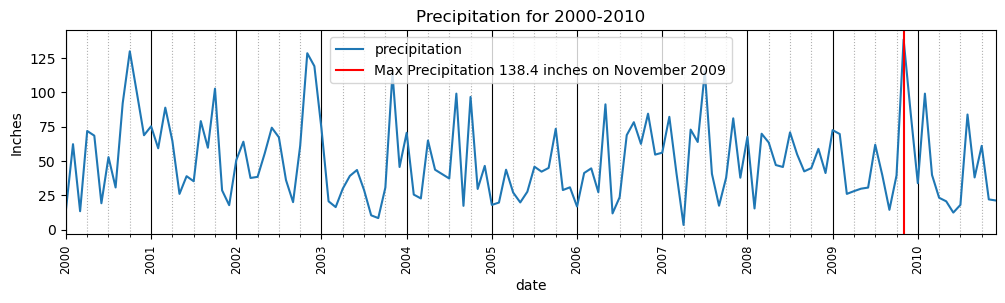

In [17]:
plot_dates(month_df['precipitation'], title='Precipitation for 2000-2010')
plt.axvline(max_month_precip, color="red",label=f"Max Precipitation {max_precip} inches on {max_month_precip.strftime('%B %Y')}")
plt.ylabel('Inches')
plt.legend();

## Q2: Which year between 2000-2020 had the coolest average temperature?

In [18]:
df.head(2)  #quick view of filtered dataframe

,cloud_cover,sunshine,global_radiation,max_temp,mean_temp,min_temp,precipitation,pressure,snow_depth
date,,,,,,,,,
1979-01-01,2.0,7.0,52.0,2.3,-4.1,-7.5,0.4,101900.0,9.0
1979-01-02,6.0,1.7,27.0,1.6,-2.6,-7.5,0.0,102530.0,8.0


In [19]:
#filtering years 2000-2020
q2_filtered_df = df.loc['2000':, ['mean_temp', 'cloud_cover']]
q2_filtered_df

,mean_temp,cloud_cover
date,,
2000-01-01,7.0,7.0
2000-01-02,7.9,7.0
2000-01-03,9.4,8.0
2000-01-04,7.0,5.0
2000-01-05,6.4,5.0
...,...,...
2020-12-27,7.5,1.0
2020-12-28,1.1,7.0
2020-12-29,2.6,7.0


In [20]:
#resampling monthly dataframe to Yearly (end of year 'A') frequency
yearly_df = q2_filtered_df.resample('A').min()
yearly_df

,mean_temp,cloud_cover
date,,
2000-12-31,-2.2,0.0
2001-12-31,-0.9,1.0
2002-12-31,-0.8,0.0
2003-12-31,-1.4,0.0
2004-12-31,0.0,0.0
2005-12-31,-0.4,0.0
2006-12-31,-0.8,0.0
2007-12-31,-0.4,0.0
2008-12-31,-0.8,0.0


In [21]:
min_yearly_temp = yearly_df['mean_temp'].idxmin()
min_temp = yearly_df['mean_temp'].min()
print(min_yearly_temp)   #confirming year of lowest avg temp
print(min_temp)   #confirming lowest avg temp

2010-12-31 00:00:00
-4.1


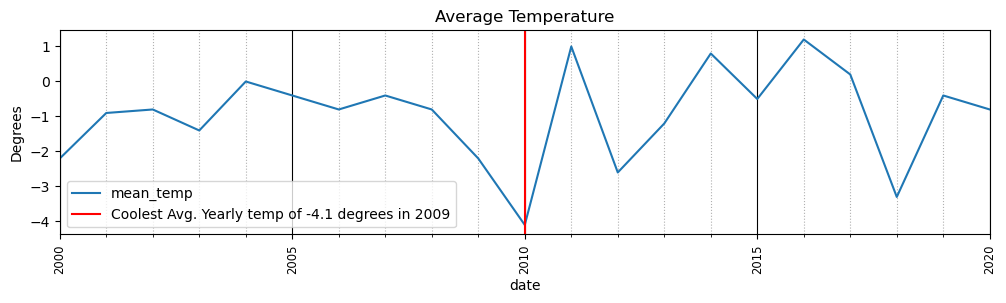

In [22]:
plot_dates(yearly_df['mean_temp'], title='Average Temperature')
plt.axvline(min_yearly_temp, color="red",label=f"Coolest Avg. Yearly temp of {min_temp} degrees in {max_month_precip.strftime('%Y')}")
plt.ylabel('Degrees')
plt.legend();